## Local Distances

In [1]:
import sys 
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.


FIt-SNE repository not detected. Functionality will be disabled.


/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [25]:
# read in Macosko retina data
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/retina_clu.csv')
# read in Herring colon data
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.norowlabels.tsv', labels=[None,0], barcodefile='../inputs/colon_clu.csv')

In [26]:
# look at dimensions of counts matrix (cells, genes)
retina.data.shape

(1652, 500)

In [27]:
# look at dimensions of counts matrix (cells, genes)
colon.data.shape

(1653, 500)

In [30]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'KLD':{}, 'Knn Pres.':{}}}

In [31]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

---

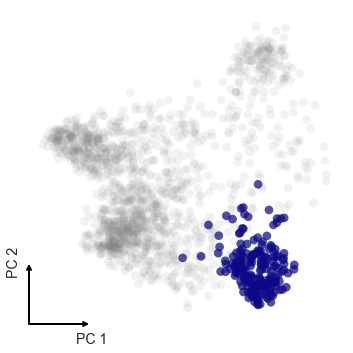

In [28]:
retina_PCA2 = fcc_PCA(matrix=retina.arcsinh_norm(), barcodes=retina.barcodes, n_components=2)
retina_PCA2.plot_barcodes(ranks=['3']) # rods & cones

In [41]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform='arcsinh'), post=retina_PCA2.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['3']), post=retina_PCA2.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA (2)'], final_distance_stats['Retina']['EMD']['PCA (2)'], final_distance_stats['Retina']['KLD']['PCA (2)'], final_distance_stats['Retina']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.3849
EMD: 0.3129
KLD: 0.1676
Knn Pres.: 82.975
CPU times: user 528 ms, sys: 34.7 ms, total: 563 ms
Wall time: 569 ms


CPU times: user 18.3 s, sys: 464 ms, total: 18.7 s
Wall time: 18.2 s


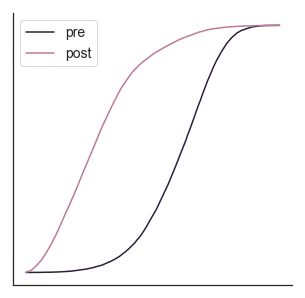

<Figure size 504x504 with 0 Axes>

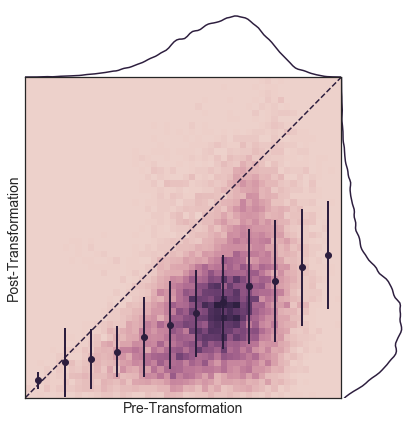

In [42]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

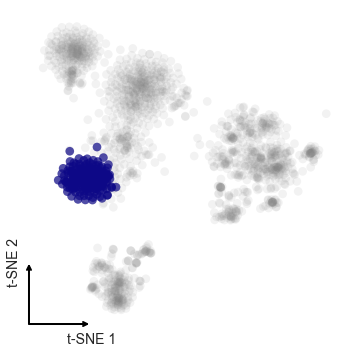

In [35]:
retina_tSNE = DR.from_file('pymethods_out/retina_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [43]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform='arcsinh'), post=retina_tSNE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['3']), post=retina_tSNE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['KLD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.4683
EMD: 0.2794
KLD: 0.1241
Knn Pres.: 79.285
CPU times: user 524 ms, sys: 31.7 ms, total: 556 ms
Wall time: 560 ms


CPU times: user 18.2 s, sys: 426 ms, total: 18.7 s
Wall time: 18.1 s


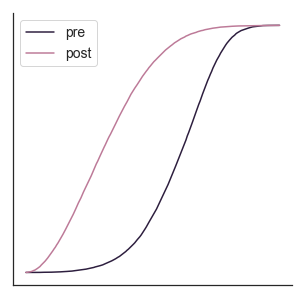

<Figure size 504x504 with 0 Axes>

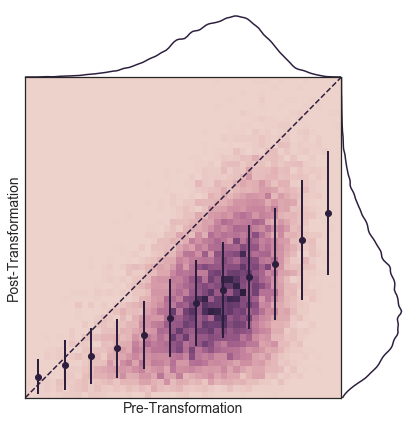

In [44]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

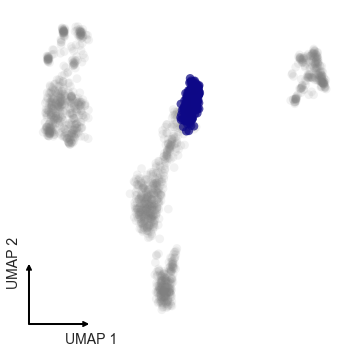

In [38]:
retina_UMAP = DR.from_file('pymethods_out/retina_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_UMAP.plot_barcodes(ranks=['3']) # rods & cones

In [45]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform='arcsinh'), post=retina_UMAP.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['3']), post=retina_UMAP.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['KLD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.0879
EMD: 0.2564
KLD: 0.1892
Knn Pres.: 76.58
CPU times: user 552 ms, sys: 41.3 ms, total: 594 ms
Wall time: 549 ms


CPU times: user 18.3 s, sys: 502 ms, total: 18.8 s
Wall time: 18.5 s


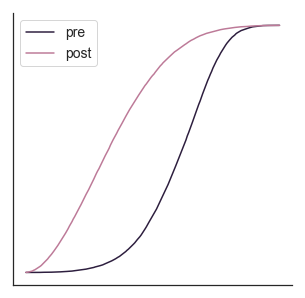

<Figure size 504x504 with 0 Axes>

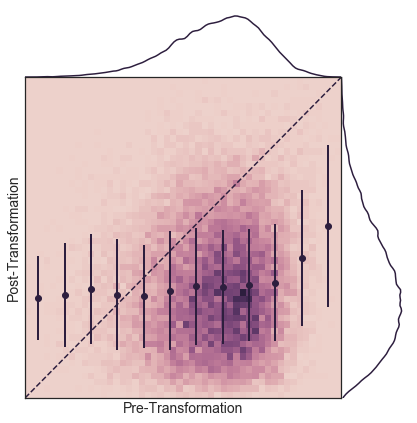

In [46]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

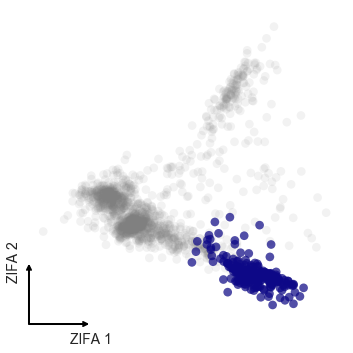

In [47]:
retina_ZIFA = DR.from_file('pymethods_out/retina_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_ZIFA.plot_barcodes(ranks=['3']) # rods & cones

In [48]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform='arcsinh'), post=retina_ZIFA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform='arcsinh', ranks=['3']), post=retina_ZIFA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZIFA'], final_distance_stats['Retina']['EMD']['ZIFA'], final_distance_stats['Retina']['KLD']['ZIFA'], final_distance_stats['Retina']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.3329
EMD: 0.3429
KLD: 0.2219
Knn Pres.: 77.99
CPU times: user 495 ms, sys: 22.9 ms, total: 517 ms
Wall time: 519 ms


CPU times: user 17.8 s, sys: 374 ms, total: 18.2 s
Wall time: 17.6 s


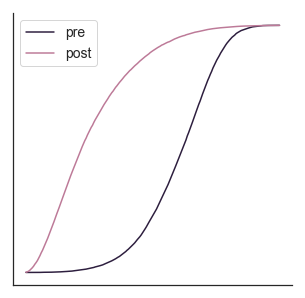

<Figure size 504x504 with 0 Axes>

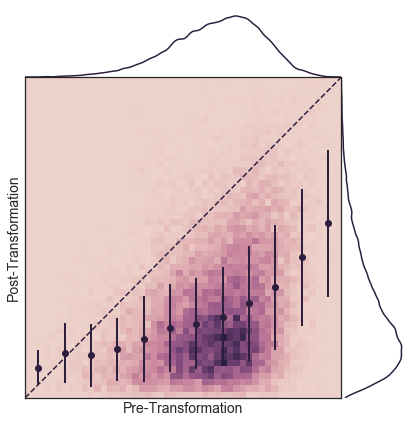

In [49]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

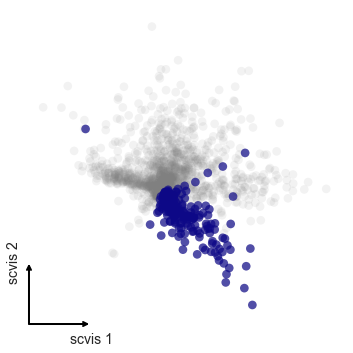

In [59]:
retina_scvis = DR.from_file('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/retina_clu.csv')
retina_scvis.plot_barcodes(ranks=['3']) # rods & cones

In [60]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_scvis.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_scvis.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scvis'], final_distance_stats['Retina']['EMD']['scvis'], final_distance_stats['Retina']['KLD']['scvis'], final_distance_stats['Retina']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.7776
EMD: 0.0512
KLD: 0.1012
Knn Pres.: 90.335
CPU times: user 485 ms, sys: 18.1 ms, total: 504 ms
Wall time: 513 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.4 s, sys: 422 ms, total: 17.8 s
Wall time: 17.3 s


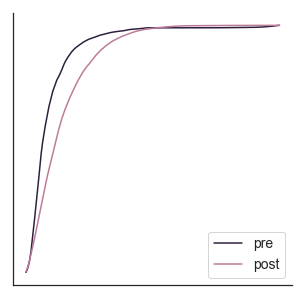

<Figure size 504x504 with 0 Axes>

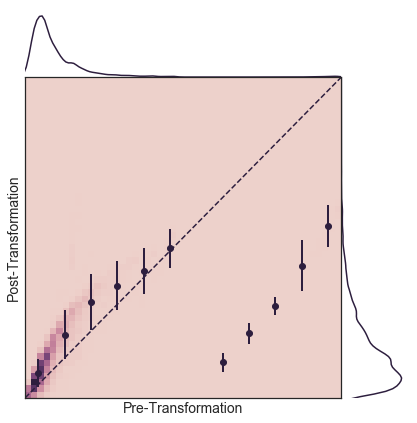

In [61]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

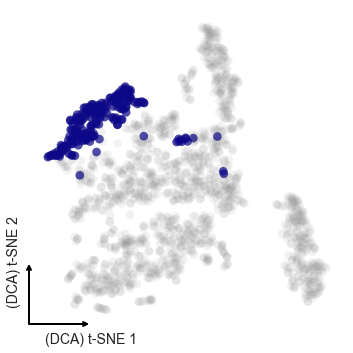

In [51]:
retina_DCA = DR.from_file('pymethods_out/retina_DCA.csv.gz', name='DCA', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_DCA_tSNE = DR.from_file('pymethods_out/retina_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_DCA_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [54]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_DCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_DCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['DCA'], final_distance_stats['Retina']['EMD']['DCA'], final_distance_stats['Retina']['KLD']['DCA'], final_distance_stats['Retina']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.9803
EMD: 0.0126
KLD: 0.0362
Knn Pres.: 90.04
CPU times: user 544 ms, sys: 15 ms, total: 559 ms
Wall time: 564 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.1 s, sys: 412 ms, total: 17.5 s
Wall time: 16.9 s


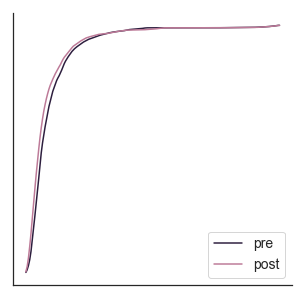

<Figure size 504x504 with 0 Axes>

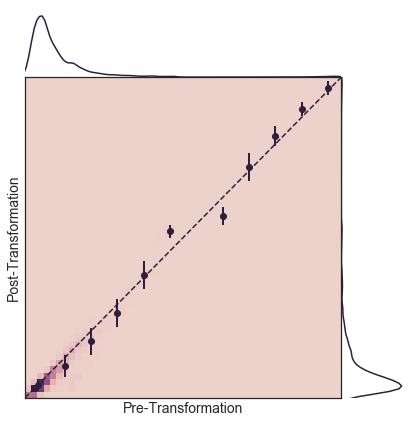

In [55]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

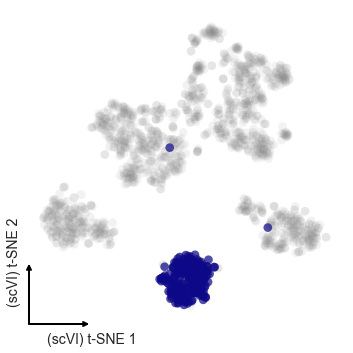

In [62]:
retina_scVI = DR.from_file('pymethods_out/retina_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_scVI_tSNE = DR.from_file('pymethods_out/retina_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/retina_clu.csv')
retina_scVI_tSNE.plot_barcodes(ranks=['3']) # rods & cones

In [63]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_scVI.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['scVI'], final_distance_stats['Retina']['EMD']['scVI'], final_distance_stats['Retina']['KLD']['scVI'], final_distance_stats['Retina']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.0665
EMD: 0.2996
KLD: 0.432
Knn Pres.: 77.1
CPU times: user 484 ms, sys: 22.2 ms, total: 506 ms
Wall time: 508 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.8 s, sys: 458 ms, total: 18.2 s
Wall time: 17.8 s


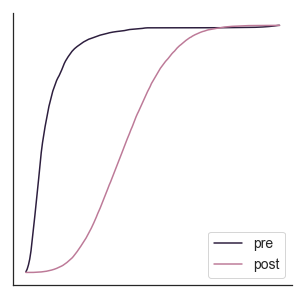

<Figure size 504x504 with 0 Axes>

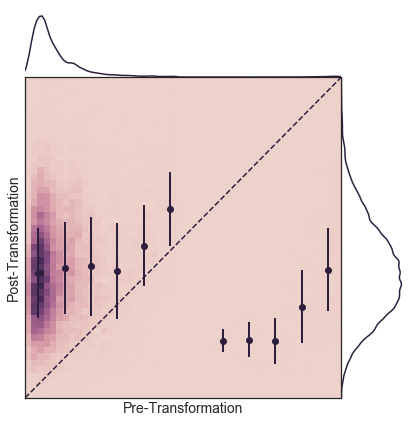

In [64]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

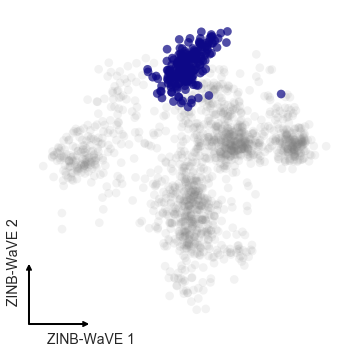

In [66]:
retina_ZINBWAVE = DR.from_file('Rmethods_out/retina_ZINB-WAVE.csv.gz', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/retina_clu.csv')
retina_ZINBWAVE.plot_barcodes(ranks=['3']) # rods & cones

In [67]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_ZINBWAVE.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_ZINBWAVE.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['ZINBWAVE'], final_distance_stats['Retina']['EMD']['ZINBWAVE'], final_distance_stats['Retina']['KLD']['ZINBWAVE'], final_distance_stats['Retina']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.3168
EMD: 0.1028
KLD: 0.3939
Knn Pres.: 76.98
CPU times: user 506 ms, sys: 24.4 ms, total: 531 ms
Wall time: 553 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.5 s, sys: 408 ms, total: 17.9 s
Wall time: 17.2 s


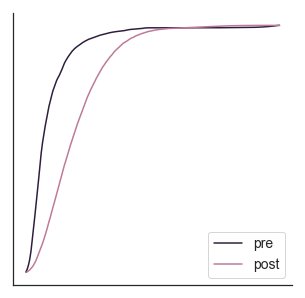

<Figure size 504x504 with 0 Axes>

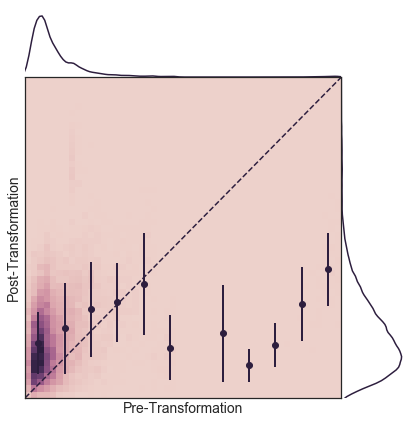

In [68]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

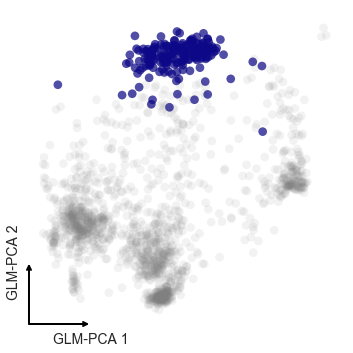

In [69]:
retina_GLMPCA = DR.from_file('Rmethods_out/retina_GLM-PCA.csv.gz', name='GLM-PCA', labels=[None,0], barcodefile='../inputs/retina_clu.csv')
retina_GLMPCA.plot_barcodes(ranks=['3']) # rods & cones

In [70]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_GLMPCA.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_GLMPCA.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['GLMPCA'], final_distance_stats['Retina']['EMD']['GLMPCA'], final_distance_stats['Retina']['KLD']['GLMPCA'], final_distance_stats['Retina']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.1622
EMD: 0.0593
KLD: 0.5473
Knn Pres.: 76.81
CPU times: user 484 ms, sys: 17.3 ms, total: 501 ms
Wall time: 507 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.4 s, sys: 329 ms, total: 17.7 s
Wall time: 16.9 s


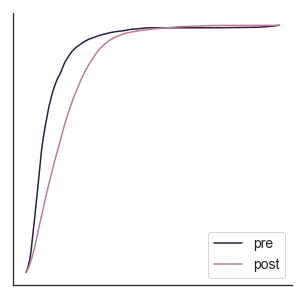

<Figure size 504x504 with 0 Axes>

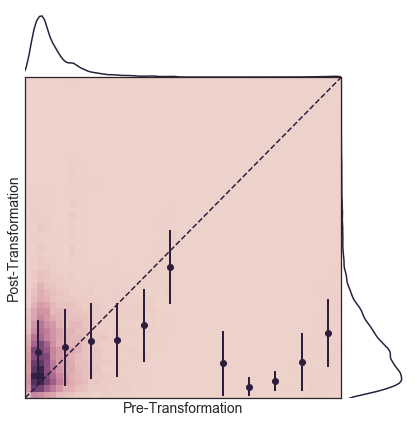

In [71]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

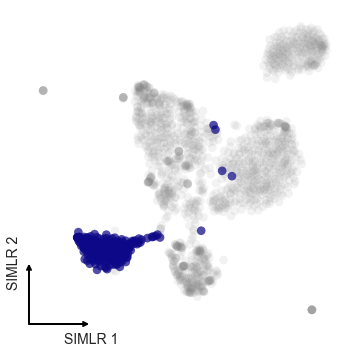

In [73]:
retina_SIMLR = DR.from_file('Rmethods_out/retina_SIMLR_F.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/retina_clu.csv')
retina_SIMLR_2D = DR.from_file('Rmethods_out/retina_SIMLR_ydata.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/retina_clu.csv')
retina_SIMLR_2D.plot_barcodes(ranks=['3']) # rods & cones

In [74]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=retina.distance_matrix(ranks=['3'],transform=None), post=retina_SIMLR.distance_matrix(ranks=['3']))
knn = knn_preservation(pre=retina.knn_graph(k, transform=None, ranks=['3']), post=retina_scVI.knn_graph(k, ranks=['3']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['SIMLR'], final_distance_stats['Retina']['EMD']['SIMLR'], final_distance_stats['Retina']['KLD']['SIMLR'], final_distance_stats['Retina']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.1309
EMD: 0.0867
KLD: 0.5316
Knn Pres.: 77.1
CPU times: user 501 ms, sys: 22.3 ms, total: 523 ms
Wall time: 528 ms


../fcc_utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  mean = sy / n
../fcc_utils.py:157: RuntimeWarning: invalid value encountered in true_divide
  std = np.sqrt(sy2/n - mean*mean)


CPU times: user 17.4 s, sys: 357 ms, total: 17.7 s
Wall time: 17 s


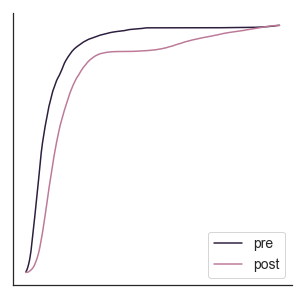

<Figure size 504x504 with 0 Axes>

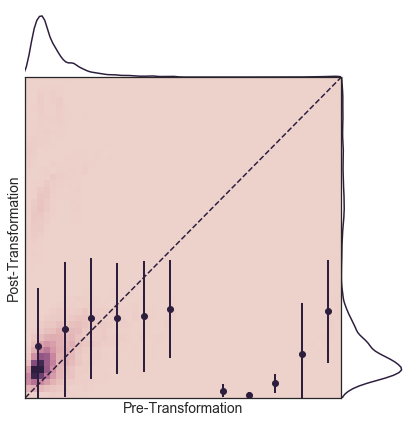

In [75]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/rods_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
# Colon

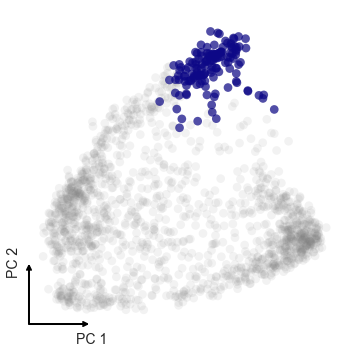

In [79]:
colon_PCA2 = fcc_PCA(matrix=colon.arcsinh_norm(), barcodes=colon.barcodes, n_components=2)
colon_PCA2.plot_barcodes(ranks=['5']) # mature goblet cells

In [83]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform='arcsinh'), post=colon_PCA2.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['5']), post=colon_PCA2.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA (2)'], final_distance_stats['Colon']['EMD']['PCA (2)'], final_distance_stats['Colon']['KLD']['PCA (2)'], final_distance_stats['Colon']['Knn Pres.']['PCA (2)'] = mantel_stats[0], EMD, KLD, knn

R: 0.473
EMD: 0.0893
KLD: 0.1906
Knn Pres.: 73.1674
CPU times: user 388 ms, sys: 23 ms, total: 411 ms
Wall time: 412 ms


CPU times: user 17.7 s, sys: 363 ms, total: 18 s
Wall time: 17.4 s


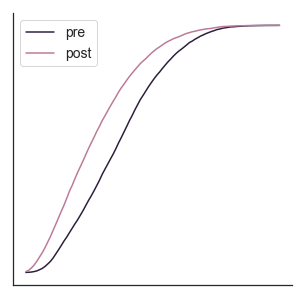

<Figure size 504x504 with 0 Axes>

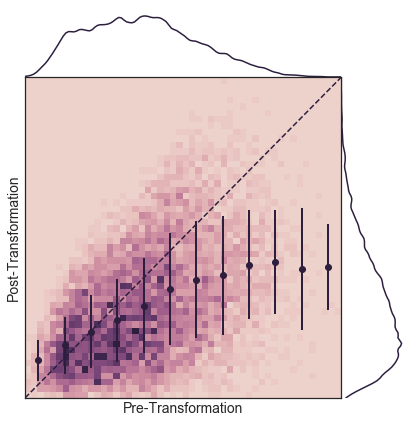

In [84]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_PCA2_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

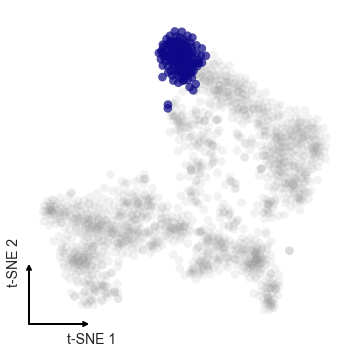

In [85]:
colon_tSNE = DR.from_file('pymethods_out/colon_tSNE.csv.gz', name='t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_tSNE.plot_barcodes(ranks=['5']) # mature goblet cells

In [86]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform='arcsinh'), post=colon_tSNE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['5']), post=colon_tSNE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['KLD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, KLD, knn

R: 0.4933
EMD: 0.0748
KLD: 0.1482
Knn Pres.: 75.9294
CPU times: user 381 ms, sys: 21.8 ms, total: 403 ms
Wall time: 416 ms


CPU times: user 17.7 s, sys: 379 ms, total: 18.1 s
Wall time: 17.5 s


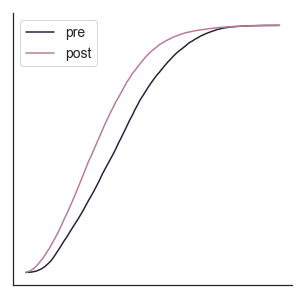

<Figure size 504x504 with 0 Axes>

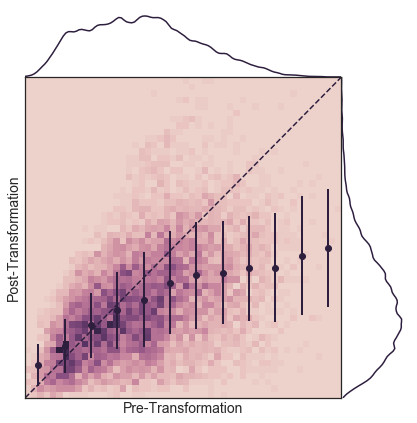

In [87]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

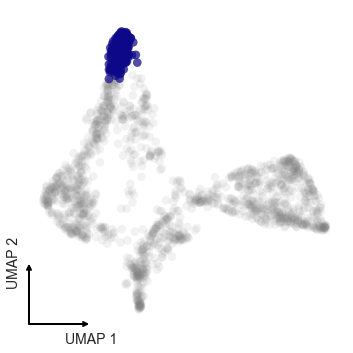

In [88]:
colon_UMAP = DR.from_file('pymethods_out/colon_UMAP.csv.gz', name='UMAP', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_UMAP.plot_barcodes(ranks=['5']) # rods & cones

In [89]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform='arcsinh'), post=colon_UMAP.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['5']), post=colon_UMAP.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['KLD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, KLD, knn

R: 0.2487
EMD: 0.0279
KLD: 0.2258
Knn Pres.: 71.5396
CPU times: user 376 ms, sys: 20.8 ms, total: 397 ms
Wall time: 400 ms


CPU times: user 18.3 s, sys: 458 ms, total: 18.7 s
Wall time: 18.5 s


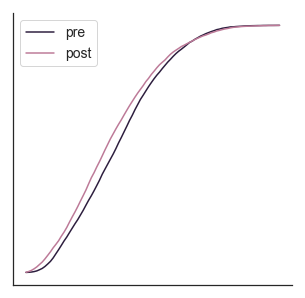

<Figure size 504x504 with 0 Axes>

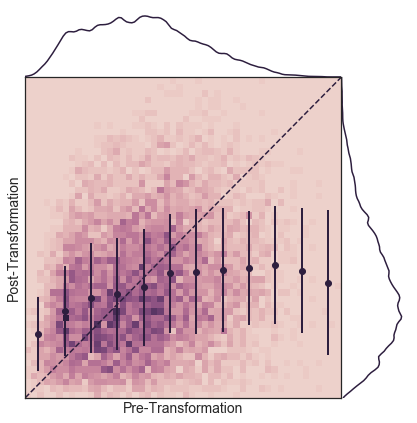

In [90]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_UMAP_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

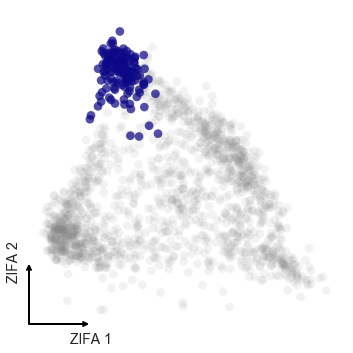

In [91]:
colon_ZIFA = DR.from_file('pymethods_out/colon_ZIFA.csv.gz', name='ZIFA', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_ZIFA.plot_barcodes(ranks=['5']) # mature goblet cells

In [92]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform='arcsinh'), post=colon_ZIFA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform='arcsinh', ranks=['5']), post=colon_ZIFA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZIFA'], final_distance_stats['Colon']['EMD']['ZIFA'], final_distance_stats['Colon']['KLD']['ZIFA'], final_distance_stats['Colon']['Knn Pres.']['ZIFA'] = mantel_stats[0], EMD, KLD, knn

R: 0.5239
EMD: 0.1252
KLD: 0.1831
Knn Pres.: 72.9259
CPU times: user 367 ms, sys: 21.8 ms, total: 389 ms
Wall time: 398 ms


CPU times: user 18.2 s, sys: 438 ms, total: 18.6 s
Wall time: 18.3 s


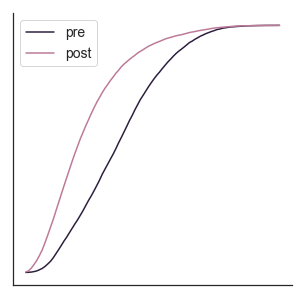

<Figure size 504x504 with 0 Axes>

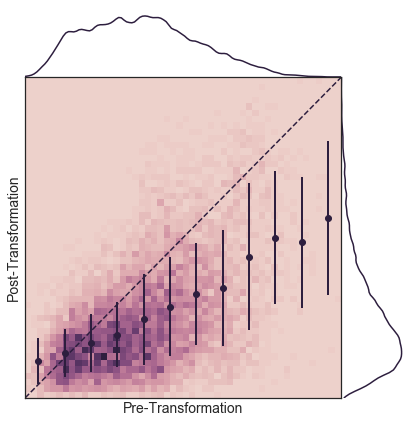

In [93]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZIFA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

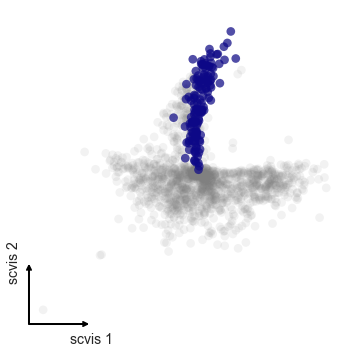

In [94]:
colon_scvis = DR.from_file('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', name='scvis', labels=[0,0], barcodefile='../inputs/colon_clu.csv')
colon_scvis.plot_barcodes(ranks=['5']) # mature goblet cells

In [95]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_scvis.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_scvis.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scvis'], final_distance_stats['Colon']['EMD']['scvis'], final_distance_stats['Colon']['KLD']['scvis'], final_distance_stats['Colon']['Knn Pres.']['scvis'] = mantel_stats[0], EMD, KLD, knn

R: 0.9065
EMD: 0.0129
KLD: 0.0521
Knn Pres.: 97.1645
CPU times: user 323 ms, sys: 12.2 ms, total: 335 ms
Wall time: 344 ms


CPU times: user 17.5 s, sys: 349 ms, total: 17.8 s
Wall time: 17.2 s


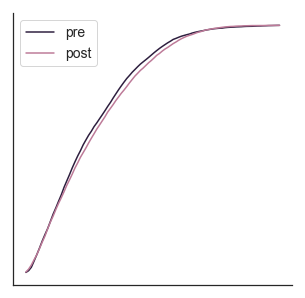

<Figure size 504x504 with 0 Axes>

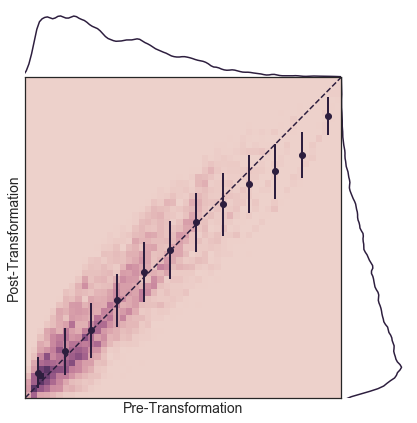

In [96]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scvis_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

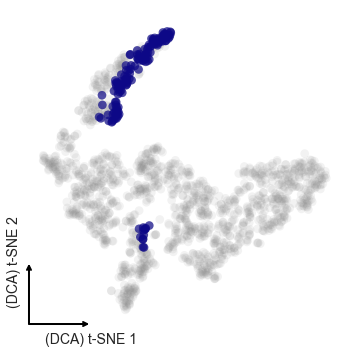

In [97]:
colon_DCA = DR.from_file('pymethods_out/colon_DCA.csv.gz', name='DCA', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_DCA_tSNE = DR.from_file('pymethods_out/colon_DCA_tSNE.csv', name='(DCA) t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_DCA_tSNE.plot_barcodes(ranks=['5']) # mature goblet cells

In [98]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_DCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_DCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['DCA'], final_distance_stats['Colon']['EMD']['DCA'], final_distance_stats['Colon']['KLD']['DCA'], final_distance_stats['Colon']['Knn Pres.']['DCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.8793
EMD: 0.024
KLD: 0.0614
Knn Pres.: 85.6018
CPU times: user 364 ms, sys: 15 ms, total: 379 ms
Wall time: 380 ms


CPU times: user 18.2 s, sys: 477 ms, total: 18.6 s
Wall time: 18.4 s


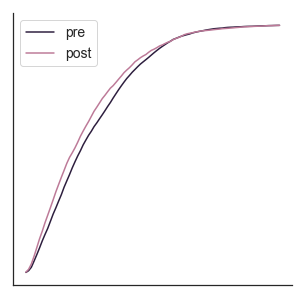

<Figure size 504x504 with 0 Axes>

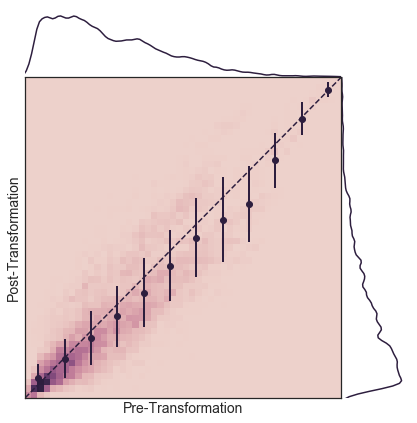

In [99]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_DCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

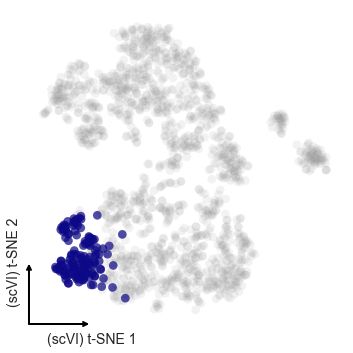

In [100]:
colon_scVI = DR.from_file('pymethods_out/colon_scVI.csv.gz', name='scVI', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_scVI_tSNE = DR.from_file('pymethods_out/colon_scVI_tSNE.csv', name='(scVI) t-SNE', labels=[None,None], barcodefile='../inputs/colon_clu.csv')
colon_scVI_tSNE.plot_barcodes(ranks=['5']) # rods & cones

In [101]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_scVI.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_scVI.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['scVI'], final_distance_stats['Colon']['EMD']['scVI'], final_distance_stats['Colon']['KLD']['scVI'], final_distance_stats['Colon']['Knn Pres.']['scVI'] = mantel_stats[0], EMD, KLD, knn

R: 0.2205
EMD: 0.1747
KLD: 0.2537
Knn Pres.: 70.1743
CPU times: user 341 ms, sys: 16.7 ms, total: 358 ms
Wall time: 369 ms


CPU times: user 17.7 s, sys: 328 ms, total: 18.1 s
Wall time: 17.5 s


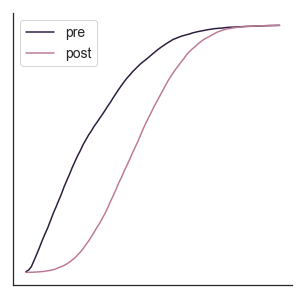

<Figure size 504x504 with 0 Axes>

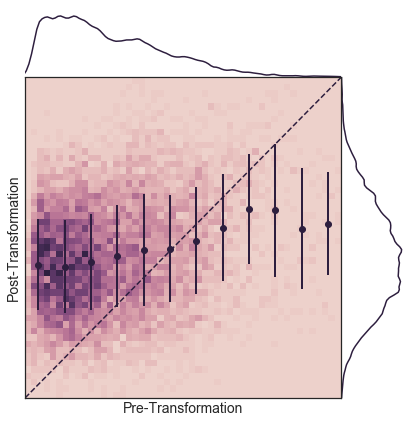

In [102]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_scVI_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

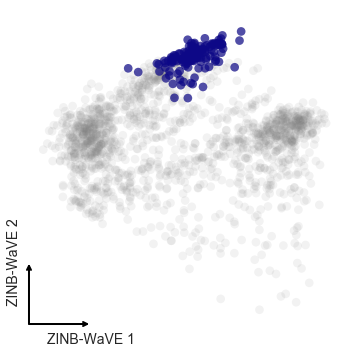

In [103]:
colon_ZINBWAVE = DR.from_file('Rmethods_out/colon_ZINB-WAVE.csv.gz', name='ZINB-WaVE', labels=[None,0], barcodefile='../inputs/colon_clu.csv')
colon_ZINBWAVE.plot_barcodes(ranks=['5']) # mature goblet cells

In [104]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_ZINBWAVE.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_ZINBWAVE.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['ZINBWAVE'], final_distance_stats['Colon']['EMD']['ZINBWAVE'], final_distance_stats['Colon']['KLD']['ZINBWAVE'], final_distance_stats['Colon']['Knn Pres.']['ZINBWAVE'] = mantel_stats[0], EMD, KLD, knn

R: 0.1866
EMD: 0.0389
KLD: 0.3847
Knn Pres.: 69.0506
CPU times: user 342 ms, sys: 15 ms, total: 357 ms
Wall time: 361 ms


CPU times: user 17.7 s, sys: 375 ms, total: 18.1 s
Wall time: 17.6 s


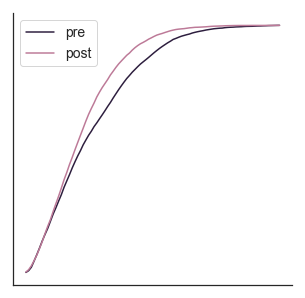

<Figure size 504x504 with 0 Axes>

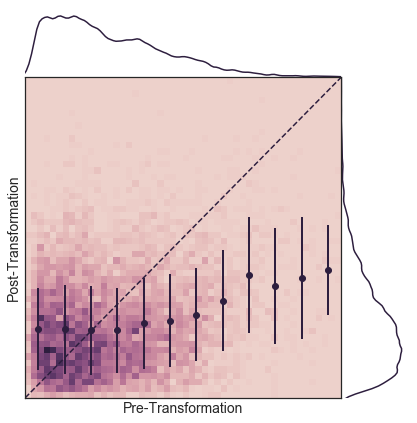

In [105]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_ZINBWAVE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

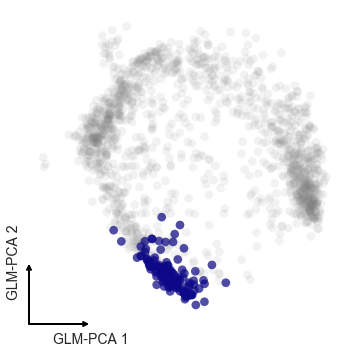

In [106]:
colon_GLMPCA = DR.from_file('Rmethods_out/colon_GLM-PCA.csv.gz', name='GLM-PCA', labels=[None,0], barcodefile='../inputs/colon_clu.csv')
colon_GLMPCA.plot_barcodes(ranks=['5']) # mature goblet cells

In [107]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_GLMPCA.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_GLMPCA.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['GLMPCA'], final_distance_stats['Colon']['EMD']['GLMPCA'], final_distance_stats['Colon']['KLD']['GLMPCA'], final_distance_stats['Colon']['Knn Pres.']['GLMPCA'] = mantel_stats[0], EMD, KLD, knn

R: 0.0977
EMD: 0.0607
KLD: 0.4389
Knn Pres.: 68.221
CPU times: user 328 ms, sys: 14.3 ms, total: 343 ms
Wall time: 346 ms


CPU times: user 18.1 s, sys: 454 ms, total: 18.6 s
Wall time: 18.3 s


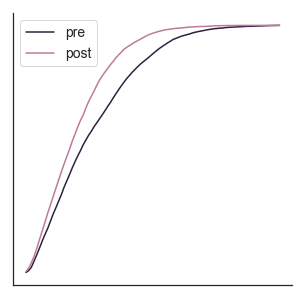

<Figure size 504x504 with 0 Axes>

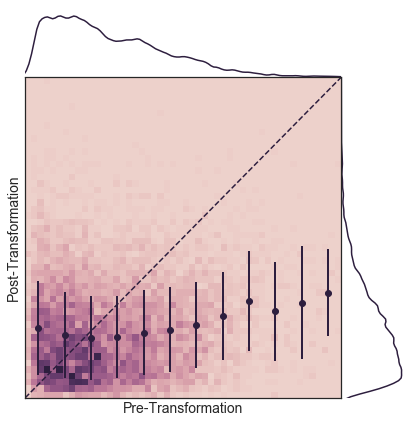

In [108]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_GLMPCA_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

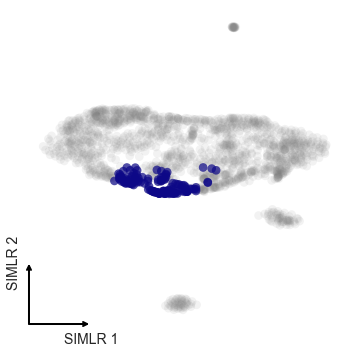

In [109]:
colon_SIMLR = DR.from_file('Rmethods_out/colon_SIMLR_F.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/colon_clu.csv')
colon_SIMLR_2D = DR.from_file('Rmethods_out/colon_SIMLR_ydata.csv.gz', name='SIMLR', labels=[None,0], barcodefile='../inputs/colon_clu.csv')
colon_SIMLR_2D.plot_barcodes(ranks=['5']) # mature goblet cells

In [110]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD, KLD = distance_stats(pre=colon.distance_matrix(ranks=['5'],transform=None), post=colon_SIMLR.distance_matrix(ranks=['5']))
knn = knn_preservation(pre=colon.knn_graph(k, transform=None, ranks=['5']), post=colon_scVI.knn_graph(k, ranks=['5']))
print('R: {}\nEMD: {}\nKLD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(KLD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['SIMLR'], final_distance_stats['Colon']['EMD']['SIMLR'], final_distance_stats['Colon']['KLD']['SIMLR'], final_distance_stats['Colon']['Knn Pres.']['SIMLR'] = mantel_stats[0], EMD, KLD, knn

R: 0.4066
EMD: 0.1074
KLD: 0.2412
Knn Pres.: 70.1743
CPU times: user 416 ms, sys: 15.9 ms, total: 432 ms
Wall time: 434 ms


CPU times: user 17.7 s, sys: 419 ms, total: 18.1 s
Wall time: 17.5 s


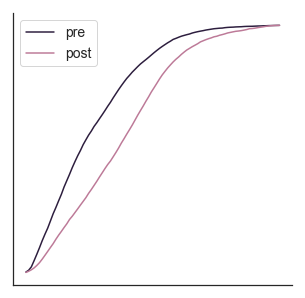

<Figure size 504x504 with 0 Axes>

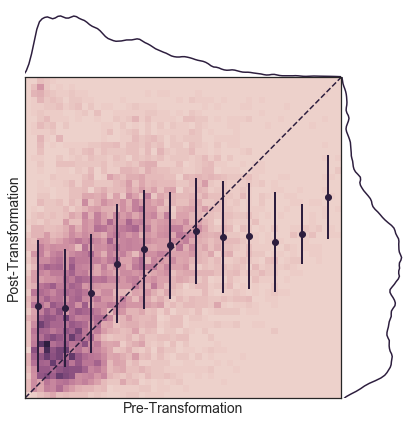

In [111]:
%%time
# output plots to file
plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_dist.png', transparent=True, bbox_inches='tight', dpi=1000)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
plt.savefig(fname='../images/goblet_SIMLR_corr.png', transparent=True, bbox_inches='tight', dpi=1000)